In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import math

In [25]:
arr1 = np.array([1,2,3],ndmin=5)
print('Number of dimensions of arr1 are: ',arr1.ndim)

Number of dimensions of arr1 are:  5


# Acessing elements from array
Array elements can be accessed by reffering to their index number.
For exaple for 1d array

In [26]:
arr1 = np.array([1,2,3])
print("Element at index 1 is: ",arr1[1])

Element at index 1 is:  2


In [27]:
arr2 = np.array([
                [1,2,3],
                [4,5,6]
                ])
print(arr2[0][0])

1


In [28]:
df = pd.read_csv('placement1.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [29]:
df.shape

(200, 2)

In [30]:
print('Mean : ',df['cgpa'].mean())


Mean :  6.990500000000001


In [31]:
# Finding the boundary values
print('Highest allowed ',df['cgpa'].mean()+ 3*df['cgpa'].std())
print('Lowest allowed ',df['cgpa']- 3*df['cgpa'].std())

Highest allowed  10.198726039668658
Lowest allowed  0      3.681774
1      1.911774
2      4.611774
3      4.211774
4      3.731774
         ...   
195    3.721774
196    2.681774
197    4.001774
198    4.421774
199    3.011774
Name: cgpa, Length: 200, dtype: float64


In [32]:
# Finding the outliers
df[ (df['cgpa']>8.80)| df['cgpa'] < 5.34 ]

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


17-mar-2024
Linear Regression model

In [33]:
df = pd.read_csv('prices.csv')
print(df)

   Area   Price
0   120   75000
1    80   50000
2   150   90000
3   100   65000
4   200  120000
5    90   55000
6   130   80000
7    70   45000
8   110   70000
9   180  110000


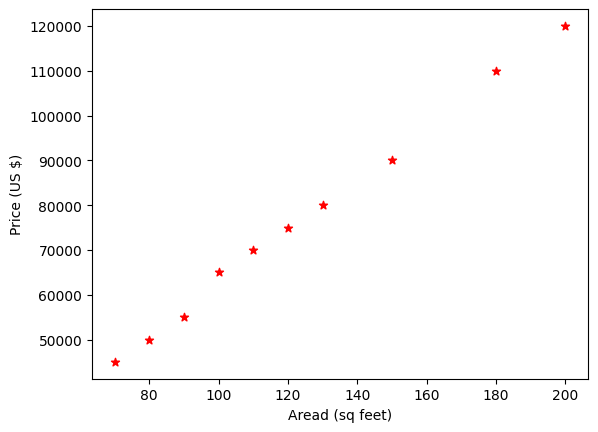

In [34]:
%matplotlib inline
plt.xlabel('Aread (sq feet)')
plt.ylabel('Price (US $)')
plt.scatter(df.Area,df.Price, color = 'red', marker = '*')
plt.show()

In [35]:
reg = linear_model.LinearRegression()
reg.fit(df[['Area']], df.Price)

LinearRegression()

In [36]:
reg.intercept_

4643.510054844577

19-mar-2024
# Linear Regression with multiple variables

In [37]:
# Loading the dataset
df = pd.read_csv('home_prices.csv')
df

,area,beds,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


Here the price depends upon 3 factors area, beds and age. If we take a look at row 2 and 3 even the 3rd row has more area, but since its old it costs less.

The three columns area, beds and age are called independent variables(features) and price is our dependent variable.

so we can write the linear equation as 
price = m1*area + m2* beds + m3*age + b, where m1,m2 and m3 are coefficients and b is intercept.
The above equation can be generalised as 

y = m1x1 + m2x2 + m3x3 + b

In [38]:
# Fixing the dataset. Since our beds column has a value 'NaN'(Not a Number) we have to fix it. We can fix it by replacing the null value with the median.

# Calculating the median

med = df.beds.median()
print(med)

3.5


In [39]:
# We got median 3.5 which is not possible so we have to fix it. We have to replace 3.5 with its seiling value(4) or floor value(3). 
med_beds_f = math.floor(med) # Floor value -> Integer value just small than the current floating value.
med_beds_c = math.ceil(med) # Ceil Value -> Integer value just greater than the current floating value.
print("Ceiling value is ->",med_beds_c)
print("Floor value is ->",med_beds_f)


Ceiling value is -> 4
Floor value is -> 3


In [41]:
# Using floor value for now
df.beds = df.beds.fillna(med_beds_f) # fillna(number) -> fills the null values with the value passed. 3 in this case.
df 

,area,beds,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [44]:
reg = linear_model.LinearRegression() # Creating a linear regression object.
reg.fit(df[['area','beds','age']],df.price) # Train the regression model.

LinearRegression()

In [45]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [46]:
reg.intercept_

383724.9999999998

In [48]:
reg.predict([[3000,3,40]])

/home/navam-sharma/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [52]:
price = 137.25 * 3000 + -26025 * 3 + -6825 * 40 + 383724.999999999 # Verification of prediction
price


444399.999999999